In [1]:
import pandas as pd #the csv reading library
import matplotlib as mpl
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns
from scipy.optimize import curve_fit


In [2]:
df = pd.read_csv('../Cruise_2024/Data/MSD_sprectra_pchip_baseline_corrected_BC.csv', sep=',', index_col=0)
df = pd.DataFrame(df)

wavelengths = list(range(250, 751))
wave_fit = list(range(450, 550))
df = df.drop('file_id', axis = 1)

df.columns = ['a' + col for col in df.columns]

#fix date time 

df_toc = pd.read_csv('../Cruise_2024/Data/TOC_MDS.csv', sep=',', index_col=0)

df_cdom = df.join(df_toc)
df_cdom

,a250,a251,a252,a253,a254,a255,a256,a257,a258,a259,...,Location,Depth,Time,NPOC_mg.L,TN_mg.L,NPOC_uM,TN_uM,dil_fac,Type,NISK_Note
Sample_ID,,,,,,,,,,,,,,,,,,,,,
241344,0.601685,0.592890,0.585609,0.576833,0.567630,0.560861,0.557398,0.558342,0.561783,0.567676,...,CL11,NaN,NaN,93.100000,1.146740,7758.333333,81.910000,28.000000,BC,NaN
241345,1.525156,1.488080,1.452368,1.418664,1.383036,1.349926,1.318154,1.291788,1.268168,1.246912,...,CL11,NaN,NaN,3.022600,0.325640,251.883333,23.260000,14.000000,BC,NaN
241348,0.848209,0.839661,0.830735,0.823319,0.811840,0.805283,0.796852,0.791576,0.785584,0.778673,...,CL11,NaN,NaN,1.300469,0.297128,108.372396,21.223437,4.375000,BC,NaN
241349,1.027912,1.019197,1.010050,1.001610,0.991863,0.983299,0.976055,0.970049,0.963879,0.955275,...,CL11,NaN,NaN,2.899750,0.447825,241.645833,31.987500,17.500000,BC,NaN
241350,0.989543,0.980323,0.965670,0.953119,0.942118,0.929052,0.920397,0.914898,0.908962,0.902582,...,CL11,NaN,NaN,1.102800,0.313520,91.900000,22.394286,4.000000,BC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241643,1.803393,1.748211,1.695654,1.646615,1.599803,1.556511,1.517237,1.480970,1.445227,1.411947,...,I,NaN,NaN,1.487621,0.305707,123.968391,21.836207,4.827586,BC,NaN
241645,1.891259,1.838532,1.787190,1.739629,1.696984,1.657837,1.618678,1.582815,1.548329,1.514462,...,I,NaN,NaN,0.954585,0.254908,79.548718,18.207692,2.153846,BC,NaN
241647,3.488934,3.403960,3.318527,3.238478,3.158033,3.081919,3.010438,2.941991,2.870741,2.803805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


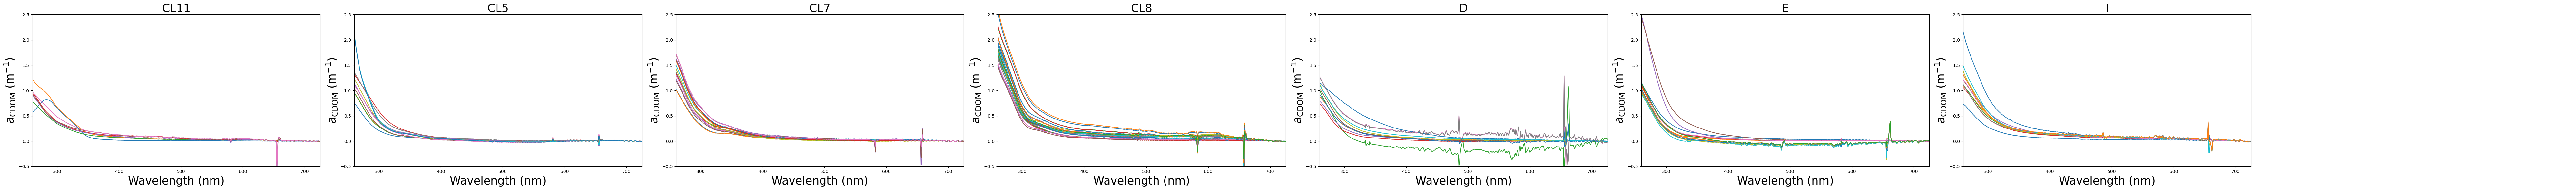

In [3]:
stations = df_cdom['Location'].unique()
fig, axes = plt.subplots(1, len(stations), figsize=(len(stations)*10, 6))

for j, station in enumerate(stations):
    # Filter by trip and station
    subset_df = df_cdom[df_cdom['Location'] == station]
        
    plotted = False  # Flag to check if something has been plotted

    # If any data exists for this combination
    if not subset_df.empty:
        for idx, row in subset_df.iterrows():
            cdom_abs = row[:501]  # Limit to the first 501 values
            cdom_abs = np.asarray(cdom_abs, dtype=float).ravel()
            wavelengths = np.asarray(wavelengths, dtype=float).ravel()
            date = row["Date"] 
            # Plot all rows in subset_df against wavelengths
            axes[j].plot(wavelengths, cdom_abs)  # use cdom_abs.values[0] to get the values of the row
            plotted = True
        axes[j].set_ylim(-.5,2.5)
        axes[j].set_xlim(260,725)
        axes[j].set_title(f'{station}', size =25)
    else: 
        axes[j].axis('off')  # Turn off the axis if no data for that combination
    
    axes[j].set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)', size=25, c='black')
    axes[j].yaxis.set_tick_params(labelsize=10)    
    axes[j].set_xlabel('Wavelength (nm)', size=25, c='black')
    axes[j].xaxis.set_tick_params(labelsize=10)

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_24308\2678443311.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


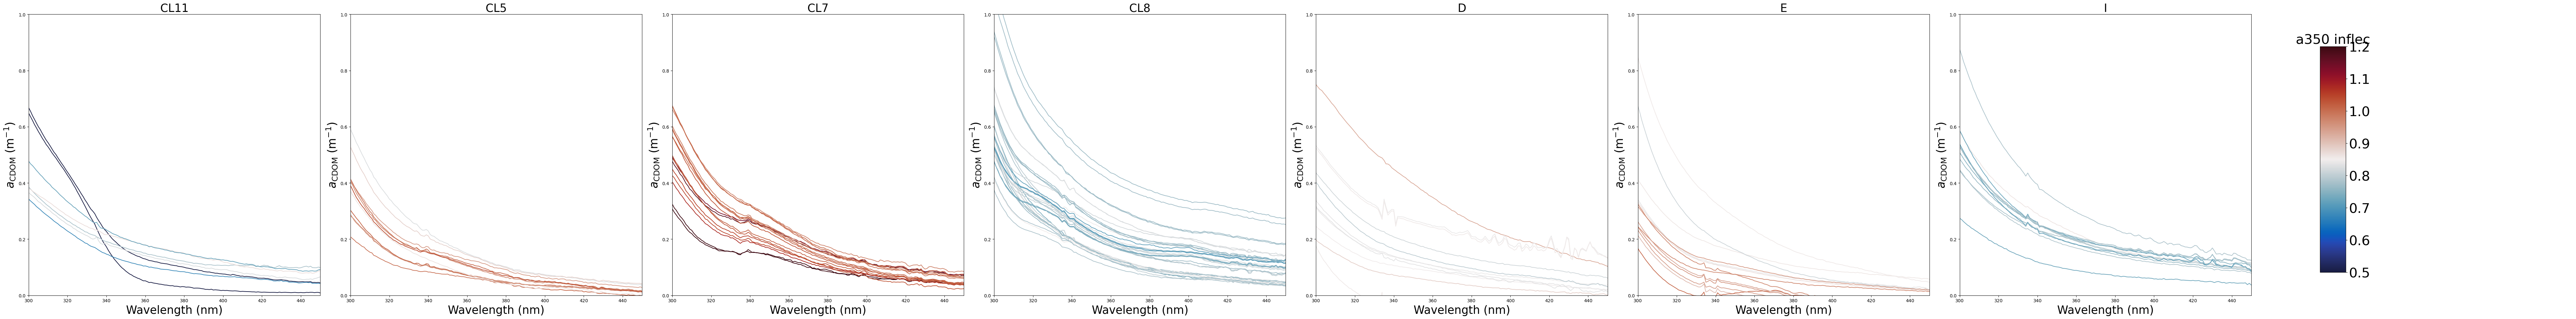

In [7]:
df_cdom["a350_norm"] = (df_cdom["a350"] - df_cdom["a400"]) / (df_cdom["a300"] - df_cdom["a400"])
df_cdom["a325_norm"] = (df_cdom["a325"] - df_cdom["a400"]) / (df_cdom["a300"] - df_cdom["a400"])
df_cdom["a375_norm"] = (df_cdom["a375"] - df_cdom["a400"]) / (df_cdom["a300"] - df_cdom["a400"])
df_cdom["a_infelc"] = df_cdom["a350_norm"] / ((df_cdom["a325_norm"] + df_cdom["a375_norm"])/2)

stations = df_cdom['Location'].unique()
fig, axes = plt.subplots(1, len(stations), figsize=(len(stations)*10, 10))

for j, station in enumerate(stations):
    # Filter by trip and station
    subset_df = df_cdom[df_cdom['Location'] == station]
        
    plotted = False  # Flag to check if something has been plotted

    # If any data exists for this combination
    if not subset_df.empty:
        for idx, row in subset_df.iterrows():
            cdom_abs = row[:501]  # Limit to the first 501 values
            cdom_abs = np.asarray(cdom_abs, dtype=float).ravel()
            wavelengths = np.asarray(wavelengths, dtype=float).ravel()
            date = row["Date"] 
            # Plot all rows in subset_df against wavelengths
            #color and plot:
            cmap=cmo.balance
            norm = plt.Normalize(vmin=.5, vmax=1.2)
            color = cmap(norm(row["a_infelc"]))
            axes[j].plot(wavelengths, cdom_abs, color=color)  # use cdom_abs.values[0] to get the values of the row
            plotted = True
        axes[j].set_ylim(0,1)
        axes[j].set_xlim(300,450)
        axes[j].set_title(f'{station}', size =25)
    else: 
        axes[j].axis('off')  # Turn off the axis if no data for that combination
    
    axes[j].set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)', size=25, c='black')
    axes[j].yaxis.set_tick_params(labelsize=10)    
    axes[j].set_xlabel('Wavelength (nm)', size=25, c='black')
    axes[j].xaxis.set_tick_params(labelsize=10)

#Add colorbar:
fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.balance, norm=plt.Normalize(vmin=.5, vmax=1.2)), cax=cbar_ax)
cbar.ax.set_title(f'a350 inflec', fontsize = 30)
cbar.ax.tick_params(labelsize=30)

plt.tight_layout()
fig.set_facecolor('w')
plt.show()